# Case Study
Below mentioned are the steps to be followed:

1. Data Exploration and Understanding
    * Load the Data
    * Understand and Viz the data
    * EDA
2. Data Preparation
    * Removing Outliers and uneccessary columns
    * Categorical variable treatment
    * Standardizing numerical variables
    * Train Test Split
3. Model Building and Training
    * Use RFE for Feature Elimination
    * Training the Model 
4. Prediction
5. Evaluation
    * Use MSE, RMSE, MEA
    * Use R2 score
6. Residual Analysis on Model
7. Principle Component Analysis


In [40]:
# Importing all necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv
/kaggle/input/co2-emission-by-vehicles/Data Description.csv


In [41]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Data Exploration and Understanding

In [42]:
df = pd.read_csv('../input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv')

In [43]:
df.shape

(7385, 12)

In [44]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [45]:
# Data Description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [46]:
df['Vehicle Class'].value_counts()

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

In [47]:
df['Cylinders'] = df['Cylinders'].astype('category')
df['Cylinders'].value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

In [48]:
df['Transmission'] = df['Transmission'].astype('category')
df['Transmission'].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

In [49]:
df['Gears'] = df['Transmission'].apply(lambda x:x[-1])
df['Gears'].value_counts()

6    3259
8    1802
7    1026
9     419
5     307
V     295
0     210
4      67
Name: Gears, dtype: int64

In [50]:
df['Gears'] = df['Gears'].replace('V','0')
df['Gears'].value_counts()

6    3259
8    1802
7    1026
0     505
9     419
5     307
4      67
Name: Gears, dtype: int64

In [51]:
df['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

<AxesSubplot:xlabel='CO2 Emissions(g/km)'>

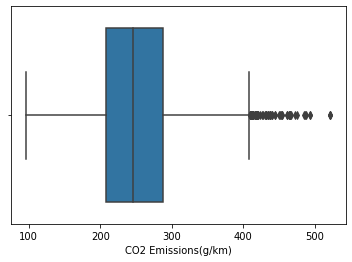

In [52]:
sns.boxplot(df['CO2 Emissions(g/km)'])

In [53]:
Q1=df['CO2 Emissions(g/km)'].quantile(0.25)
Q3=df['CO2 Emissions(g/km)'].quantile(0.75)
IQR=Q3-Q1
Q3+1.5*IQR

408.0

In [54]:
# Outlier Treatment
Q3=df.quantile(0.75)
IQR=Q3-Q1
df = df.loc[df['CO2 Emissions(g/km)']<= 408]

In [55]:
df.shape

(7305, 13)

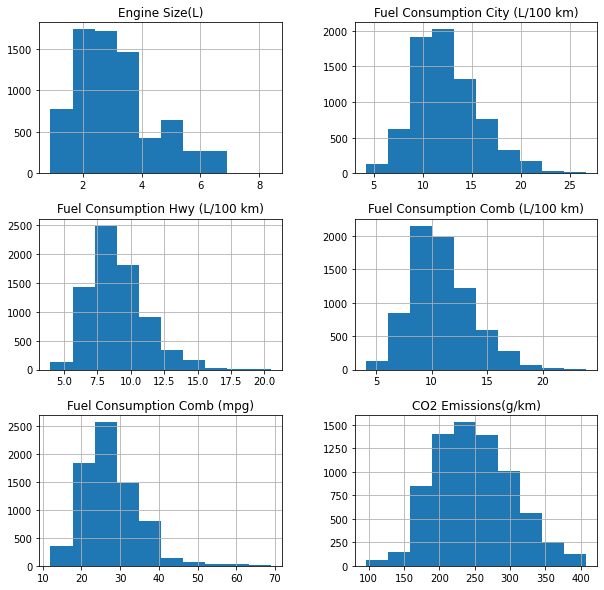

In [56]:
# Hist Plots 
Numerical = df.select_dtypes(include = ['int64','float'])
Numerical.hist(figsize = (10,10))
plt.show()

In [57]:
Categorical = df.select_dtypes(include=['category','object'])
Categorical.head()

,Make,Model,Vehicle Class,Cylinders,Transmission,Fuel Type,Gears
0,ACURA,ILX,COMPACT,4,AS5,Z,5
1,ACURA,ILX,COMPACT,4,M6,Z,6
2,ACURA,ILX HYBRID,COMPACT,4,AV7,Z,7
3,ACURA,MDX 4WD,SUV - SMALL,6,AS6,Z,6
4,ACURA,RDX AWD,SUV - SMALL,6,AS6,Z,6


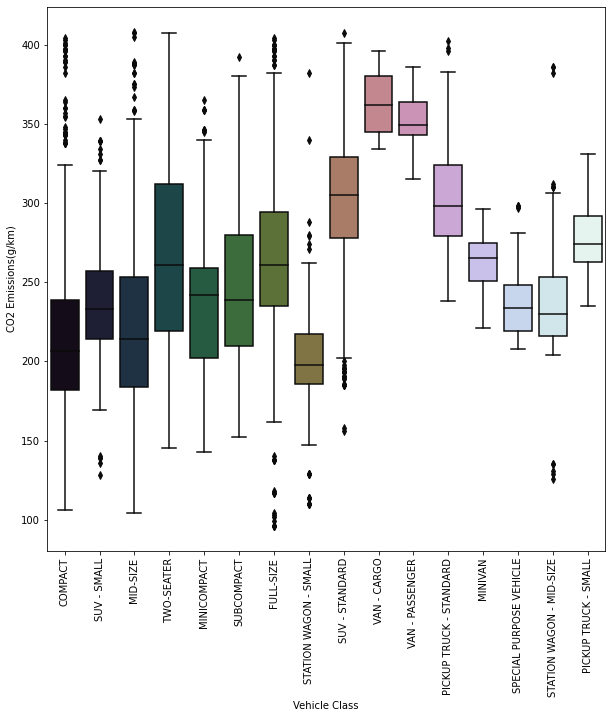

In [58]:
# Vehicle Class with CO2 Emission
plt.figure(figsize = (10,10))
sns.boxplot(data = df, x='Vehicle Class', y='CO2 Emissions(g/km)', palette = 'cubehelix')
plt.xticks(rotation = 90)
plt.show()

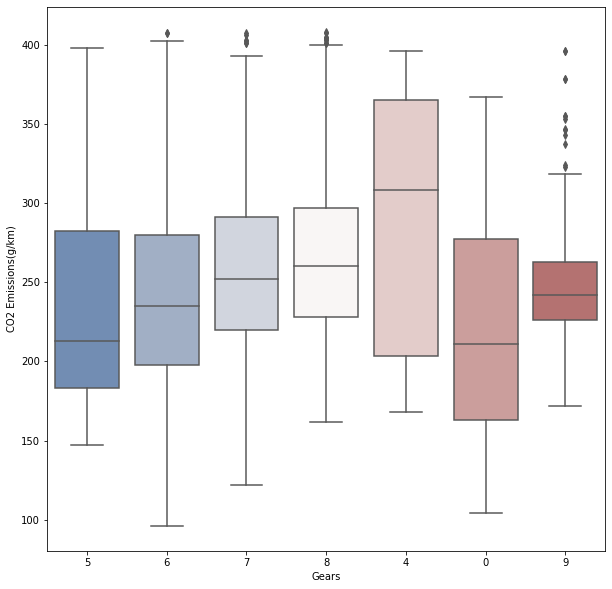

In [59]:
# Gears with C02 Emission
plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = 'Gears', y = 'CO2 Emissions(g/km)', palette = 'vlag')
plt.show()

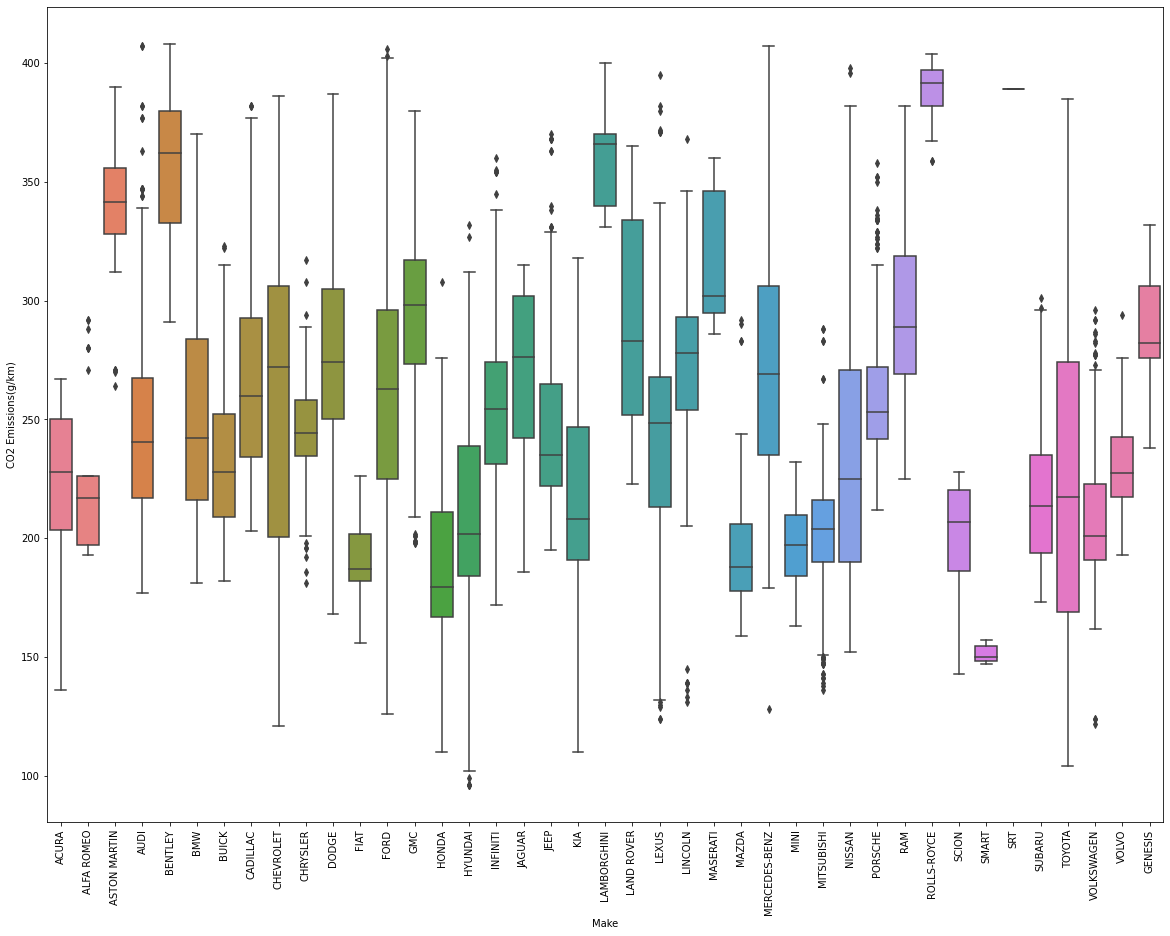

In [60]:
# Car Makers with C02 Emission
plt.figure(figsize = (20,15))
sns.boxplot(data = df, x='Make', y='CO2 Emissions(g/km)', palette = 'husl')
plt.xticks(rotation = 90)
plt.show()

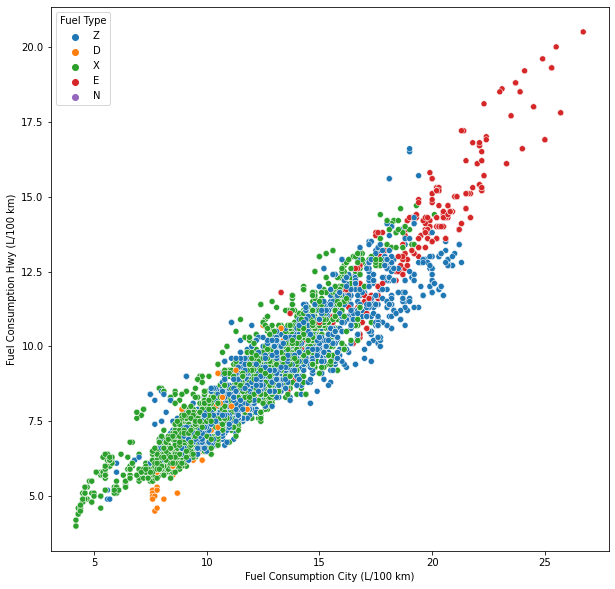

In [61]:
# City Fuel Consumption vs Highway Fuel Consumption with Fuel Category
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = 'Fuel Consumption City (L/100 km)', y = 'Fuel Consumption Hwy (L/100 km)', hue = 'Fuel Type')
plt.show()

In [62]:
# Fuel Consumption by Fuel Categories
df.groupby(by = 'Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean()

Fuel Type
D     8.835429
E    16.662155
N    12.700000
X    10.010122
Z    11.320531
Name: Fuel Consumption Comb (L/100 km), dtype: float64

In [63]:
# Pivot Table with Cylinders, Fuel Type and C02 Emissions
df.pivot_table(values = ['CO2 Emissions(g/km)'], index = ['Cylinders','Fuel Type'], aggfunc = 'mean')

CO2 Emissions(g/km)
Cylinders Fuel Type                     
3         X                   160.432432
          Z                   184.120690
4         D                   215.460674
          E                   203.370370
          X                   199.208906
          Z                   216.315735
5         X                   233.150000
          Z                   244.166667
6         D                   260.406977
          E                   262.723270
          N                   213.000000
          X                   271.614793
          Z                   256.478861
8         E                   306.825503
          X                   321.944584
          Z                   315.677861
10        Z                   355.615385
12        Z                   368.271318

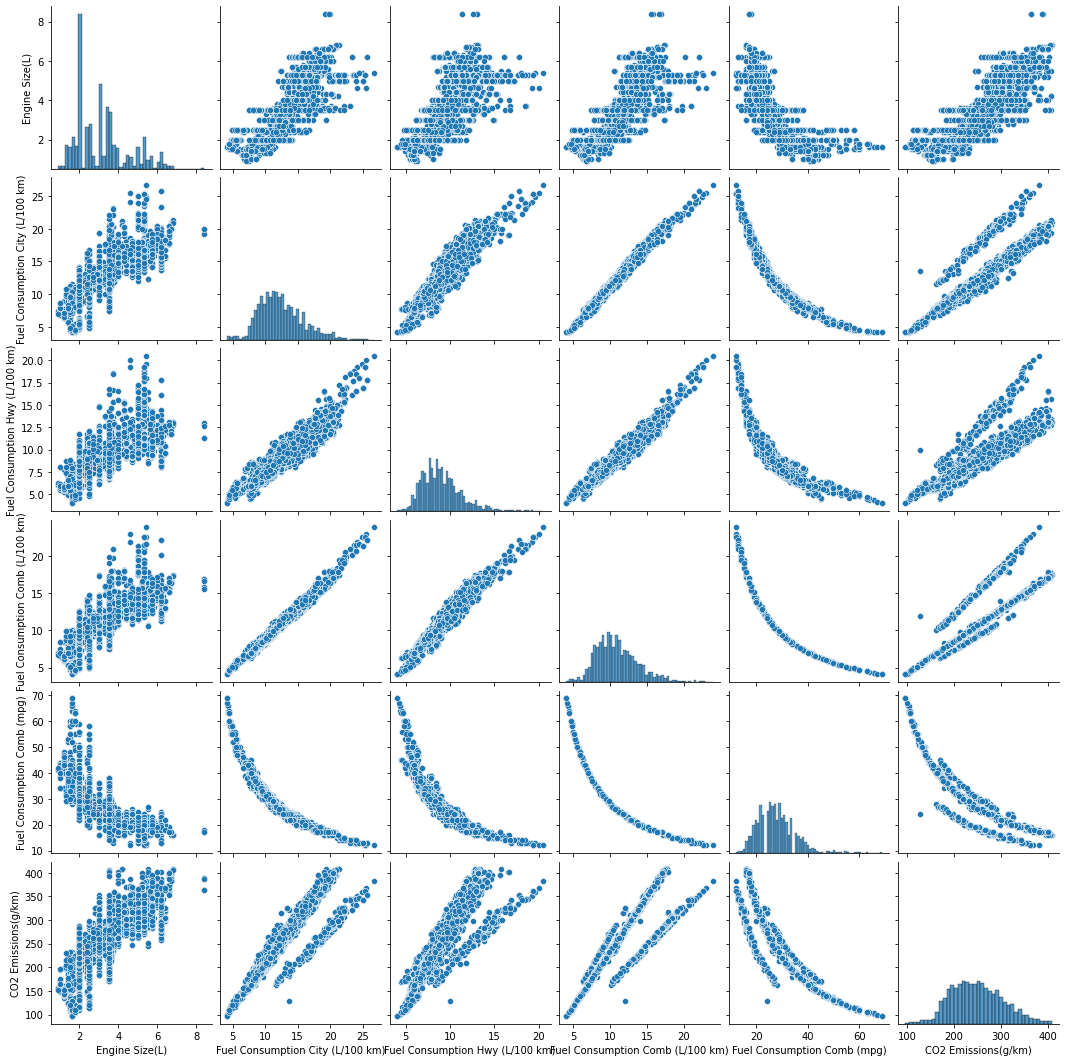

In [64]:
# Pairplot for all values
sns.pairplot(df, palette = 'husl')

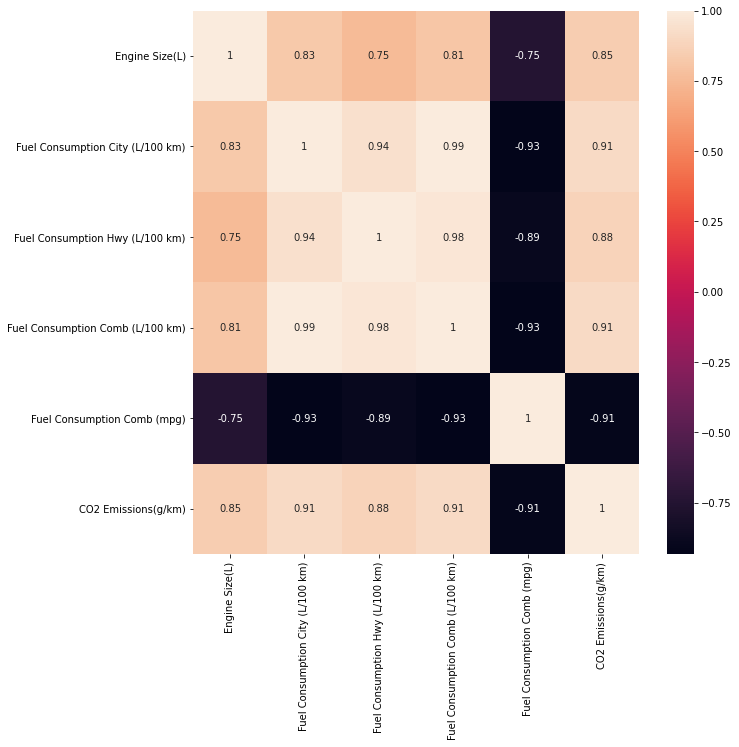

In [65]:
# Heatmap for all vvalues
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

From Heatmap, we get some interesting points :
1. All Numerical Values are highly correlated to C02 Emission.
2. There is huge correlation between independent variables, which leads to interpretibility problem. 

In [66]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,6


# 2. Data Preparation 

In [71]:
# Standardization for Numerical Data
from sklearn.preprocessing import StandardScaler
Numerical.drop('CO2 Emissions(g/km)', inplace = True, axis=1)
df_num = pd.DataFrame(StandardScaler().fit_transform(Numerical), 
                      columns = Numerical.columns)
df_num.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851483,-0.764650,-1.071161,-0.866076,0.752982
1,-0.549688,-0.373256,-0.599473,-0.465625,0.192775
2,-1.228728,-1.938833,-1.495681,-1.812596,2.853758
3,0.280251,0.078353,0.060890,0.080444,-0.367432
4,0.280251,-0.102290,-0.127785,-0.101579,-0.087329


In [72]:
Categorical = Categorical.loc[:,['Vehicle Class','Transmission','Fuel Type','Cylinders','Gears']]
Categorical.head()

,Vehicle Class,Transmission,Fuel Type,Cylinders,Gears
0,COMPACT,AS5,Z,4,5
1,COMPACT,M6,Z,4,6
2,COMPACT,AV7,Z,4,7
3,SUV - SMALL,AS6,Z,6,6
4,SUV - SMALL,AS6,Z,6,6


In [73]:
# One hot Encoding for Categorical Values
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

df_cat = pd.DataFrame(encoder.fit_transform(Categorical), columns=encoder.get_feature_names(Categorical.columns))
df_cat

,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,...,Cylinders_6,Cylinders_8,Cylinders_10,Cylinders_12,Gears_4,Gears_5,Gears_6,Gears_7,Gears_8,Gears_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
print(df_cat.shape)
print(df_num.shape)

(7305, 57)
(7305, 5)


In [75]:
data = pd.concat([df_cat, df_num], axis = 1)
data.head()

,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,...,Gears_5,Gears_6,Gears_7,Gears_8,Gears_9,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,-0.851483,-0.764650,-1.071161,-0.866076,0.752982
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.549688,-0.373256,-0.599473,-0.465625,0.192775
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.228728,-1.938833,-1.495681,-1.812596,2.853758
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.280251,0.078353,0.060890,0.080444,-0.367432
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.280251,-0.102290,-0.127785,-0.101579,-0.087329


In [76]:
target = df['CO2 Emissions(g/km)']
data = data

In [77]:
print(data.shape)
print(target.shape)

(7305, 62)
(7305,)


In [78]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5844, 62)
(5844,)
(1461, 62)
(1461,)


# 3. Model Building and Training

In [79]:
# Feature Elimination using RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
LR = LinearRegression()
rfe = RFE(LR, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [80]:
temp_df = pd.DataFrame({'Columns': X_train.columns, 'Included': rfe.support_, 'Ranking': rfe.ranking_})
temp_df.loc[temp_df.Included == True, :]

,Columns,Included,Ranking
13,Vehicle Class_VAN - CARGO,True,1
14,Vehicle Class_VAN - PASSENGER,True,1
25,Transmission_AM9,True,1
41,Fuel Type_E,True,1
42,Fuel Type_N,True,1
43,Fuel Type_X,True,1
44,Fuel Type_Z,True,1
46,Cylinders_5,True,1
49,Cylinders_10,True,1
50,Cylinders_12,True,1


In [81]:
X_train_cols = list(X_train.columns[rfe.support_])

In [82]:

X_train_rfe = X_train[X_train_cols]

X_train_rfe.shape

(5844, 15)

<AxesSubplot:>

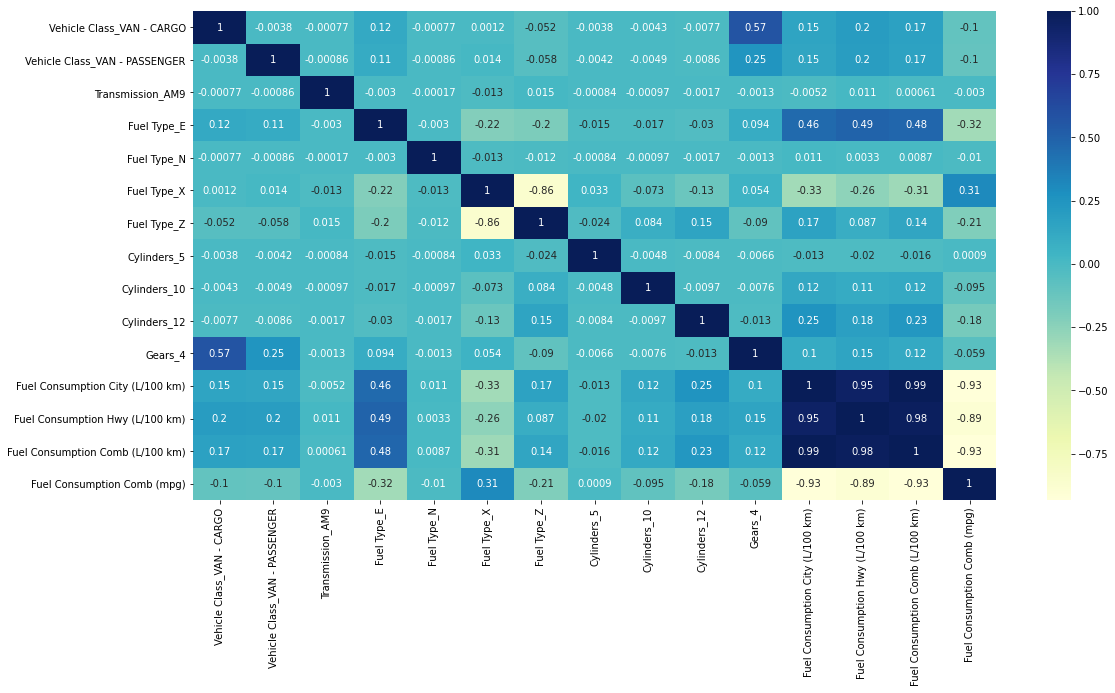

In [84]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train_rfe.corr(), cmap="YlGnBu", annot = True)

In [85]:
# Dropping cells due to Multicollinearity
X_train_rfe =X_train_rfe.drop( columns = ['Gears_4','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Type_Z'] )

In [86]:
X_train_rfe.head()

,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER,Transmission_AM9,Fuel Type_E,Fuel Type_N,Fuel Type_X,Cylinders_5,Cylinders_10,Cylinders_12,Fuel Consumption Comb (L/100 km)
1843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.718652
5685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.463820
1262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.245392
3537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.735727
1917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.938885


In [90]:
LR.fit(X_train_rfe, y_train)

LinearRegression()

In [91]:
X_test_rfe = X_test[X_train_cols]
X_test_rfe  =X_test_rfe.drop( columns = ['Gears_4','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)','Fuel Type_Z'] )

# 4. Prediction

In [93]:
y_test_pred_rfe = LR.predict(X_test_rfe)

# 5. Evaluation

In [94]:
# Metrics for Performance Checking
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_test_pred_rfe))
print(metrics.mean_squared_error(y_test, y_test_pred_rfe))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe)))

3.643065527404026
40.53226369319352
6.366495401175872


In [95]:
# R2 score
print(metrics.r2_score(y_test, y_test_pred_rfe))

0.9861753789781624


In [96]:
temp_df =pd.DataFrame({'y_test':y_test, 'y_test_pred_rfe': y_test_pred_rfe})
temp_df.tail()

,y_test,y_test_pred_rfe
285,308,310.269870
7353,278,276.321899
5384,168,169.951589
413,186,190.320372
5304,296,294.197519


# 6. Residual Analysis of Model

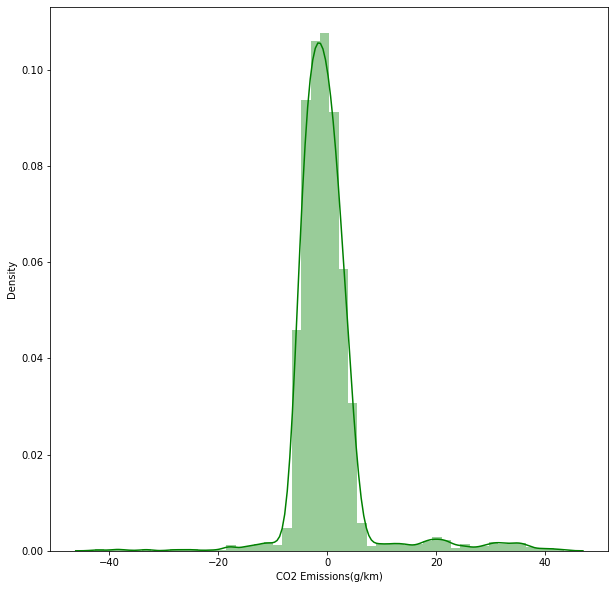

In [98]:
plt.figure(figsize = (10,10))
y_train_pred_rfe = LR.predict(X_train_rfe)
Residual = y_train - y_train_pred_rfe
sns.distplot(Residual, color='green', kde=True)
plt.show()

# 7. Principal Component Analysis

In [101]:
X_train.shape

(5844, 62)

In [102]:
X_train.head()

,Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,...,Gears_5,Gears_6,Gears_7,Gears_8,Gears_9,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
1843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.317372,1.704144,1.711798,1.718652,-1.347794
5685,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.129353,1.282643,1.711798,1.463820,-1.207743
1262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.317372,1.192321,1.287279,1.245392,-1.067691
3537,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.468270,0.951463,0.296734,0.735727,-0.787587
1917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-1.153279,-1.065722,-0.693811,-0.938885,0.893034


In [103]:
from sklearn.decomposition import PCA
pca = PCA(random_state= 0)
pca.fit(X_train)

PCA(random_state=0)

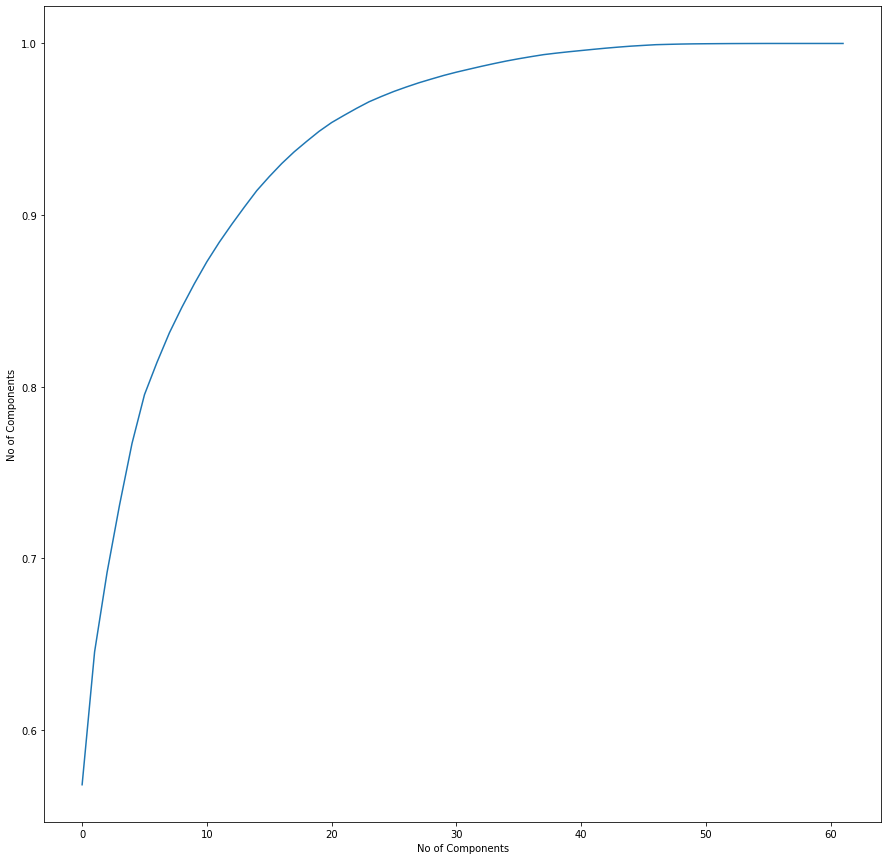

In [104]:
# Plot for Eigen Vectors and Variance ratio
plt.figure(figsize = (15,15))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('No of Components')
plt.show()

In [106]:
# Cummulative Sum of Eigen Vectors
np.cumsum(pca.explained_variance_ratio_)

array([0.56812908, 0.64553896, 0.6918076 , 0.73108749, 0.76698215,
       0.79540133, 0.8141766 , 0.83146596, 0.84631451, 0.86005886,
       0.87283248, 0.88423545, 0.89466984, 0.90462026, 0.91424738,
       0.9223962 , 0.93002174, 0.93686237, 0.94295691, 0.94882158,
       0.95391289, 0.95813038, 0.96219906, 0.96601933, 0.96914097,
       0.97206569, 0.97466103, 0.97709679, 0.97927717, 0.98139095,
       0.9832722 , 0.98497632, 0.986659  , 0.98824982, 0.98975483,
       0.99110092, 0.99233216, 0.99349356, 0.99436071, 0.99514978,
       0.99587415, 0.99659096, 0.99727068, 0.99788528, 0.99843759,
       0.99887285, 0.99929008, 0.99948018, 0.99965347, 0.99976982,
       0.99983656, 0.99988938, 0.99993581, 0.99996198, 0.99998187,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [107]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 14, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [108]:
X_train_pca.shape

(5844, 14)

<AxesSubplot:>

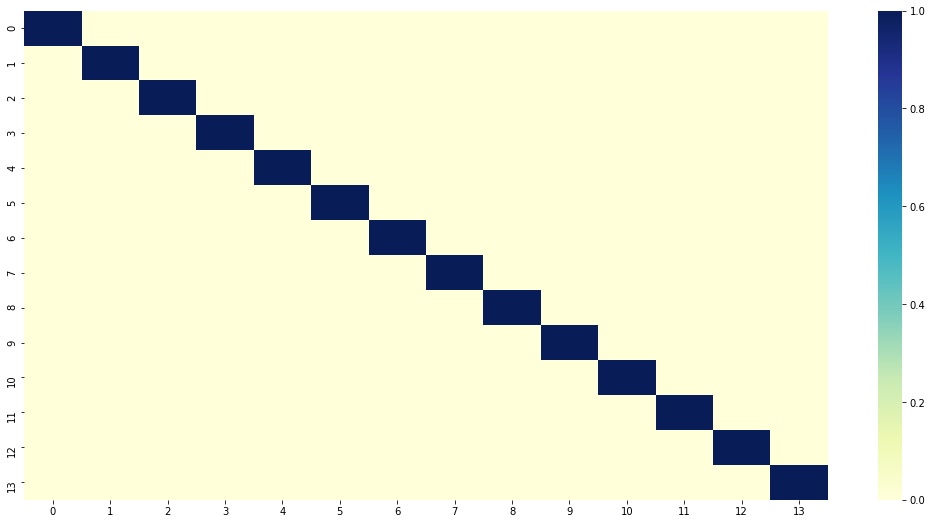

In [109]:
# Correlation matrix between Eigen vector of PCA
corrmat = np.corrcoef(X_train_pca.T)
plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [110]:
X_test_pca = pca_final.transform(X_test)

In [111]:
LR.fit(X_train_pca, y_train)
y_test_pred_pca = LR.predict(X_test_pca)

In [112]:
# Metrics for Performance Checking
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_test_pred_pca))
print(metrics.mean_squared_error(y_test, y_test_pred_pca))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_pca)))

11.238446194316916
245.7046472360929
15.674968811327597


In [113]:
print(metrics.r2_score(y_test, y_test_pred_pca))

0.9161958074423147


In [114]:
temp_df =pd.DataFrame({'y_test':y_test, 'y_test_pred_pca': y_test_pred_pca})
temp_df.tail()

,y_test,y_test_pred_pca
285,308,321.403415
7353,278,272.728399
5384,168,164.819807
413,186,184.589019
5304,296,282.973081


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Density'>

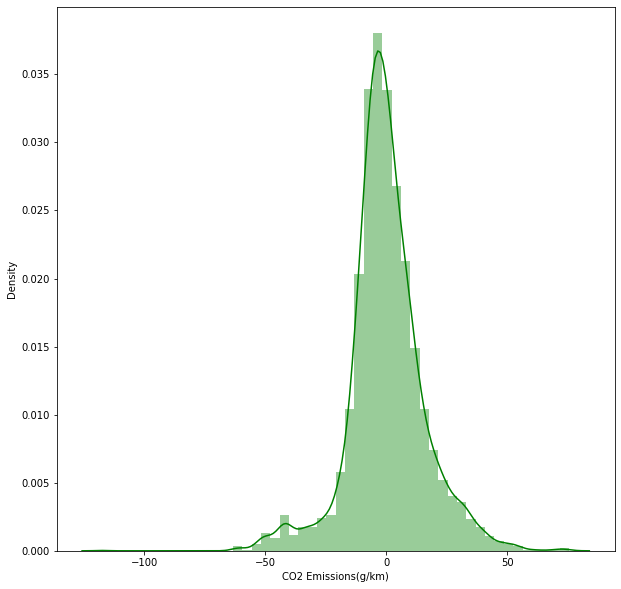

In [115]:
plt.figure(figsize = (10,10))
y_train_pca = LR.predict(X_train_pca)
Residual_pca = y_train - y_train_pca
sns.distplot(Residual_pca, color='green', kde=True)